## Zeitlicher Ablauf der Datenerfassung

### Einleitung

In diesem Notebook geht es darum den zeitlichen Ablauf der Datenerfassung darzustellen.
Dabei werden als zeitliche Kennzahlen die arithmetischen Mittelwerte genutzt sowie die min und maximal Zeitwerte.     
Die Daten werden mit einer Smartphone Android App erfasst (https://github.com/SandGreif/Fahrradwege-Monitoring-App).

In [29]:
import pandas
import os
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

In [4]:
featuresDf = pandas.read_csv("../daten/merkmale.csv")
featuresDf.describe()

,Zeitstempel in Unixzeit,Breitengrad,Laengengrad,Geschwindigkeit in km/h,Hoehe in m ueber WGS 84,Anzahl der Messwerte,Start des Zeitfensters in ns seit Start der JVM,Start der Messwerterfassung in ns seit Start der JVM,Start der Belichtung in ns seit Start der JVM,Belichtungszeit in ns,...,Varianz X-Achse Beschleunigung in m/s^2,Varianz Y-Achse Beschleunigung in m/s^2,Varianz Z-Achse Beschleunigung in m/s^2,Varianz Nick in rad,Varianz Roll in rad,Standardabweichung X-Achse Beschleunigung in m/s^2,Standardabweichung Y-Achse Beschleunigung in m/s^2,Standardabweichung Z-Achse Beschleunigung in m/s^2,Standardabweichung Nick in rad,Standardabweichung Roll in rad
count,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,...,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,1.521815e+12,53.611756,10.141385,15.431479,70.983613,19.335401,1.232928e+14,1.232927e+14,1.232928e+14,1.717044e+07,...,5.090925,40.109086,47.298581,0.453278,0.755017,1.843783,4.890581,5.664694,0.604631,0.617375
std,1.711999e+05,0.001963,0.004292,2.578698,2.540434,0.574053,1.712002e+11,1.712002e+11,1.712005e+11,5.915285e+06,...,9.928539,84.530317,74.631600,0.415298,1.384871,1.300870,4.024882,3.900985,0.296218,0.611603
min,1.521815e+12,53.608086,10.136243,6.012000,64.299440,14.000000,1.229923e+14,1.229923e+14,1.229924e+14,1.000184e+07,...,0.051570,0.293240,0.390830,0.004730,0.001030,0.227090,0.541520,0.625160,0.068770,0.032090
25%,1.521815e+12,53.610050,10.137212,14.256000,69.145140,19.000000,1.231447e+14,1.231447e+14,1.231448e+14,1.000184e+07,...,0.955515,5.312705,8.138980,0.129180,0.027425,0.977505,2.304930,2.852890,0.359415,0.165605
50%,1.521815e+12,53.612152,10.140454,15.768001,71.069275,19.000000,1.232957e+14,1.232956e+14,1.232957e+14,2.000368e+07,...,2.177540,13.362630,20.536700,0.327060,0.113760,1.475650,3.655490,4.531740,0.571890,0.337280
75%,1.521815e+12,53.613777,10.145028,17.208002,72.942380,20.000000,1.234378e+14,1.234377e+14,1.234378e+14,2.000368e+07,...,5.343015,33.826275,52.282975,0.663675,0.834570,2.311500,5.816035,7.230695,0.814660,0.913545
max,1.521815e+12,53.613907,10.149695,20.268002,77.023680,22.000000,1.235899e+14,1.235898e+14,1.235899e+14,2.999632e+07,...,190.706400,1037.005440,998.218210,2.811090,12.292420,13.809650,32.202570,31.594590,1.676630,3.506050


In [5]:
featuresDf.columns

Index(['Zeitstempel in Unixzeit', 'Breitengrad', 'Laengengrad',
       'Geschwindigkeit in km/h', 'Hoehe in m ueber WGS 84',
       'X-Achse Beschleunigungswerte in m/s^2',
       'Y-Achse Beschleunigungswerte in m/s^2',
       'Z-Achse Beschleunigungswerte in m/s^2', 'Gier Messwerte in rad',
       'Nick Messwerte in rad', 'Roll Messwerte in rad',
       'Zeitstempel der Messwerte in ns', 'Anzahl der Messwerte',
       'Start des Zeitfensters in ns seit Start der JVM',
       'Start der Messwerterfassung in ns seit Start der JVM',
       'Start der Belichtung in ns seit Start der JVM',
       'Belichtungszeit in ns',
       'Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM',
       'Stopp der Messwerterfassung in Unixzeit',
       'Mittelwert X-Achse Beschleunigung in m/s^2',
       'Mittelwert Y-Achse Beschleunigung in m/s^2',
       'Mittelwert Z-Achse Beschleunigung in m/s^2', 'Mittelwert Nick in rad',
       'Mittelwert Roll in rad', 'GierAenderung in rad',
     

In [6]:
# Mittelwert der Belichtungszeit aller Aufnahmen umgerechnet in ms
meanExposureTime = featuresDf['Belichtungszeit in ns'].mean() / 1000000
meanExposureTime

17.170441215503875

In [7]:
# Mittelwert Anzahl der Messwerte pro Merkmal
featuresDf['Anzahl der Messwerte'].mean()

19.335400516795865

In [8]:
# Dauer des Zeitfensters in ms
timeframe = 80

In [9]:
# Mittelwert vom Stop der Datenerfassung in ms bis zum Ende des Zeitfensters in ms
meanStopMeasurementToEndTimeframeTime =(featuresDf['Letzter Zeitstempel der Messwerterfassung in ns seit Start der JVM'] 
                          - (featuresDf['Start des Zeitfensters in ns seit Start der JVM'] + (timeframe * 1000000))).mean()
meanStopMeasurementToEndTimeframeTime = meanStopMeasurementToEndTimeframeTime / 1000000
meanStopMeasurementToEndTimeframeTime

69.44929643255813

In [10]:
# Mittelwert vom Aufruf das die Aufnahme fertig ist bis zum Stopp der Messwerterfassung in ms
meanStopMeasurementTime = featuresDf['Zeitstempel in Unixzeit'].mean() - featuresDf['Stopp der Messwerterfassung in Unixzeit'].mean()
meanStopMeasurementTime

1.98291015625

In [11]:
# Mittelwert vom Start der Messwert Datenerfassung bis zum Start des Zeitfensters in ms
meanStartMeasurementDataTime = featuresDf['Start des Zeitfensters in ns seit Start der JVM'].mean() - featuresDf['Start der Messwerterfassung in ns seit Start der JVM'].mean()
meanStartMeasurementDataTime = meanStartMeasurementDataTime / 1000000
meanStartMeasurementDataTime

62.55835509375

Bei der Berechnung des zeitlichen Abstandes von erfassten Bildaufnahmen ist zu beachten, dass die verwendete Daten aus einer Datenerfassungsserie stammen also einem Datensatz.      
Als Kennwert wird nämlich die Zeitstempel Spalte aus der Merkmal CSV Datei genutzt. Der Zeitstempel gibt an, wann das Bild aufgenommen wurde in Unixzeit. Zwischen zwei erfassten    
Datensätzen ist meistens einige Zeit mehr vergangen. Deshalb wird für die Berechnung ein Datensatz genutzt. Der angegebene Zeitwert wird in dem Notebook frameRate berechnet in dem Ordner datenanalyse. 

In [12]:
# Mittelwert des Abstandes bis das nächste Bild aufgenommen wurde von den Datensatz 15 mit 305.906 ms aufgerundet auf 306 Ms.
# Hierbei ist zu beachten 
meanCaptureImagesTime = 306 

In [13]:
# In dieser Zelle werden die Vielfachen der Mittelwerte in Listen angehängt, um exemplarisch
# den weiteren Verlauf einer Datenserie mit gemittelten Zeitwerten in einem Diagram darzustellen.

# Anzahl der Bilder
numberImages = 4
imageCounter = 1
meanExposureOffset = (timeframe - meanExposureTime) / 2
# Listen die mit den entsprechenden Vielfachen der Zeitangaben gefüllt werden

# Gibt mittlere Zeitwerte an zu welchem ein Bild bereit ist zum abspeichern 
meanCaptureImagesTimeList = []
# Start der Zeitfenster 
startTimeFrameList = []
startExposureTimeList = []
exposureTimeList = []
while imageCounter <= numberImages:
    meanCaptureImagesTimeList.append(meanCaptureImagesTime * imageCounter)
    startTimeFrameList.append(meanCaptureImagesTimeList[imageCounter-1] - meanStopMeasurementToEndTimeframeTime - meanStopMeasurementTime - timeframe)
    startExposureTimeList.append(startTimeFrameList[imageCounter-1] + meanExposureOffset)
    exposureTimeList.append(startExposureTimeList[imageCounter-1] + meanExposureTime)
    imageCounter = imageCounter + 1
    

In [14]:
# Ausgabe der Zeitwerte in ms
meanCaptureImagesTimeList

[306, 612, 918, 1224]

In [15]:
startTimeFrameList

[154.56779341119187, 460.5677934111918, 766.5677934111918, 1072.5677934111918]

In [16]:
meanExposureOffset

31.414779392248064

In [17]:
startExposureTimeList

[185.98257280343995, 491.9825728034399, 797.9825728034399, 1103.9825728034398]

In [18]:
exposureTimeList

[203.15301401894382, 509.1530140189438, 815.1530140189437, 1121.1530140189436]

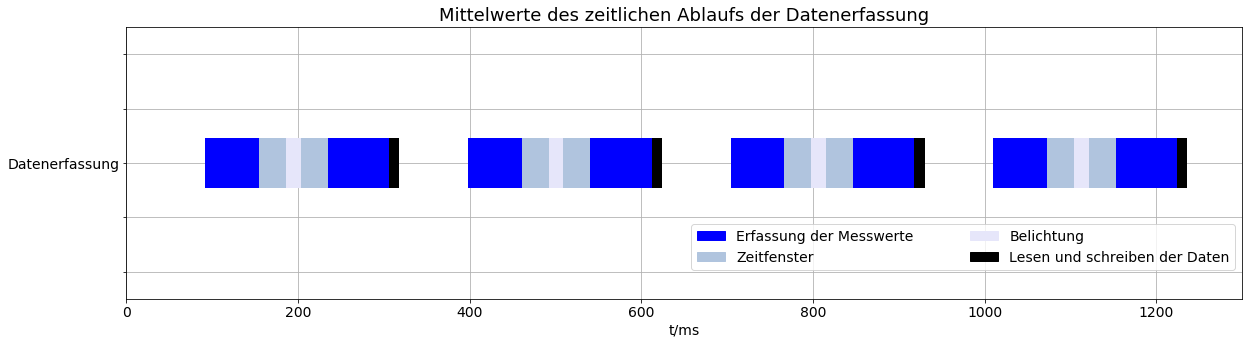

In [116]:
fig, ax = plt.subplots(figsize=(20,5))
i = 0
while i < numberImages:
    ax.hlines(xmin=startTimeFrameList[i]-meanStartMeasurementDataTime,xmax=startTimeFrameList[i],y=4, colors="blue", lw=50)
    ax.hlines(xmin=startTimeFrameList[i],xmax=startTimeFrameList[i]+timeframe,y=4, colors="lightsteelblue", lw=50)
    ax.hlines(xmin=startExposureTimeList[i],xmax=exposureTimeList[i],y=4, colors="lavender", lw=50)
    ax.hlines(xmin=startTimeFrameList[i]+timeframe,xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime,y=4, colors="blue", lw=50)
    ax.hlines(xmin=meanCaptureImagesTimeList[i],xmax=meanCaptureImagesTimeList[i] + meanStopMeasurementTime + 10,y=4, colors="black", lw=50)
    i = i + 1

def formatter(y, pos):
    if y == 4:
        return 'Datenerfassung'
    else:
        return ''

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.xlabel('t/ms',fontsize=14)
plt.title('Mittelwerte des zeitlichen Ablaufs der Datenerfassung',fontsize=18)
plt.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0,1300)
plt.ylim(3.5,4.5)
ds_patch = mpatches.Patch(color='blue', label='Erfassung der Messwerte')
red_patch2 = mpatches.Patch(color='lightsteelblue', label='Zeitfenster')
red_patch3 = mpatches.Patch(color='lavender', label='Belichtung')
red_patch4 = mpatches.Patch(color='black', label='Lesen und schreiben der Daten')
plt.legend(bbox_to_anchor=(0.5, 0.2, 0.5, .102), loc=0, ncol=2, mode="expand", handles=[ds_patch,red_patch2,red_patch3,red_patch4])
plt.rcParams["legend.fontsize"] = 14